In [1]:
# Dependencies
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Hospital, FiresStation, Doctor

In [2]:
hospital = pd.read_csv('../Results/Hospital_Rating.csv')
del hospital['Unnamed: 0']
hospital.replace('NAN', value=0, inplace=True)
hospital = hospital.rename(columns={'hospital Total Count':'Total Count', 'Facility hospital':'Hospital Facility'})
hospital['Rating']=hospital['Rating'].astype(float)
hospital['Total Count']=hospital['Total Count'].astype(int)
hospital.head()

,City Name,Hospital Facility,Latitude,Longitude,Rating,Site Name,Total Count
0,Northern Virginia Area,Watson Salsbury Pediatrics,38.96,-77.42,0.0,Center for Innovation Technology,1
1,Northern Virginia Area,Neighborhood Health,38.84,-77.05,2.8,Crystal City and Potomac Yard,1
2,Washington DC,St. Elizabeths Hospital,38.86,-77.01,4.1,Nationals Park/ D.C United Stadium,6
3,Washington DC,Children's Health Center – Anacostia,38.86,-77.01,3.9,Nationals Park/ D.C United Stadium,6
4,Washington DC,Saint Elizabeth hospital Washington D.C.20002,38.86,-77.01,4.0,Nationals Park/ D.C United Stadium,6


In [3]:
new_hospital = hospital.groupby(['City Name', 'Site Name'])
hospital_count_df = pd.DataFrame(new_hospital['Site Name'].value_counts())
hospital_count_df = hospital_count_df.rename(columns={'Site Name': 'Total Count'})
hospital_count_df = hospital_count_df.reset_index(level=1)
hospital_count_df = hospital_count_df.reset_index(level=0)
hospital_count_df = hospital_count_df.reset_index(drop=True)
hospital_count_df.head()

,City Name,Site Name,Total Count
0,Atlanta,Downtown Atlanta,15
1,Atlanta,Former GM plant,5
2,Atlanta,Midtown,6
3,Atlanta,The High Street Site,3
4,Austin,American-Statesman,7


In [4]:
hospital_count_final = hospital_count_df.groupby(['City Name'])
hospital_count_final_df = pd.DataFrame(hospital_count_final['Total Count'].median())
hospital_count_final_df = hospital_count_final_df.sort_values(['Total Count'])[::-1]
hospital_count_final_df = hospital_count_final_df.reset_index()
hospital_count_final_df['Type']='Hospital'
hospital_count_final_df

,City Name,Total Count,Type
0,New York,12.0,Hospital
1,Chicago,11.0,Hospital
2,Boston,10.0,Hospital
3,Los Angeles,9.0,Hospital
4,Washington DC,6.0,Hospital
5,Atlanta,5.5,Hospital
6,Raleigh,3.0,Hospital
7,Austin,3.0,Hospital
8,Northern Virginia Area,1.0,Hospital


In [5]:
firestation = pd.read_csv('../Results/FireStation_Rating.csv')
del firestation['Unnamed: 0']
firestation.replace('NAN', value=0, inplace=True)
firestation = firestation.rename(columns={'fire_station Total Count':'Total Count', 'Facility fire_station':'FireStation Facility'})
firestation['Rating']=firestation['Rating'].astype(float)
firestation['Total Count']=firestation['Total Count'].astype(int)
firestation.head()

,City Name,FireStation Facility,Latitude,Longitude,Rating,Site Name,Total Count
0,Northern Virginia Area,Metropolitan Washington Airports Authority Fir...,38.96,-77.42,0.0,Center for Innovation Technology,2
1,Northern Virginia Area,Frying Pan Fire Station # 36,38.96,-77.42,4.6,Center for Innovation Technology,2
2,Northern Virginia Area,Arlington County Fire Station 5,38.84,-77.05,5.0,Crystal City and Potomac Yard,6
3,Northern Virginia Area,Fire Station 209,38.84,-77.05,0.0,Crystal City and Potomac Yard,6
4,Northern Virginia Area,Alexandria Fire Station,38.84,-77.05,5.0,Crystal City and Potomac Yard,6


In [6]:
new_firestation = firestation.groupby(['City Name', 'Site Name'])
firestation_count_df = pd.DataFrame(new_firestation['Site Name'].value_counts())
firestation_count_df = firestation_count_df.rename(columns={'Site Name': 'Total Count'})
firestation_count_df = firestation_count_df.reset_index(level=1)
firestation_count_df = firestation_count_df.reset_index(level=0)
firestation_count_df = firestation_count_df.reset_index(drop=True)
firestation_count_df.head()

,City Name,Site Name,Total Count
0,Atlanta,Downtown Atlanta,6
1,Atlanta,Former GM plant,1
2,Atlanta,Midtown,4
3,Atlanta,The High Street Site,3
4,Austin,American-Statesman,6


In [7]:
firestation_count_final = firestation_count_df.groupby(['City Name'])
firestation_count_final_df = pd.DataFrame(firestation_count_final['Total Count'].median())
firestation_count_final_df = firestation_count_final_df.sort_values(['Total Count'])[::-1]
firestation_count_final_df = firestation_count_final_df.reset_index()
firestation_count_final_df['Type']='Fire Station'
firestation_count_final_df

,City Name,Total Count,Type
0,New York,13.5,Fire Station
1,Chicago,10.5,Fire Station
2,Washington DC,10.0,Fire Station
3,Boston,10.0,Fire Station
4,Raleigh,4.0,Fire Station
5,Northern Virginia Area,4.0,Fire Station
6,Los Angeles,4.0,Fire Station
7,Atlanta,3.5,Fire Station
8,Austin,3.0,Fire Station


In [8]:
doctor = pd.read_csv('../Results/Doctor_Rating.csv')
del doctor['Unnamed: 0']
doctor.replace('NAN', value=0, inplace=True)
doctor = doctor.rename(columns={'doctor Total Count':'Total Count', 'Facility doctor':'Doctor Facility'})
doctor['Rating']=doctor['Rating'].astype(float)
doctor['Total Count']=doctor['Total Count'].astype(int)
doctor.head()

,City Name,Doctor Facility,Latitude,Longitude,Rating,Site Name,Total Count
0,Northern Virginia Area,"Dr. Ravi Iyer, M.D.",38.96,-77.42,5.0,Center for Innovation Technology,1
1,Washington DC,Anderson Ronald L MD,38.86,-77.01,3.6,Nationals Park/ D.C United Stadium,1
2,Washington DC,Dr. Zeba Shaheen Geloo MD,38.89,-77.00,1.0,Union Station,3
3,Washington DC,Washington Primary Care Physicians,38.89,-77.00,2.0,Union Station,3
4,Washington DC,Anderson Ronald L MD,38.89,-77.00,3.6,Union Station,3


In [9]:
new_doctor = doctor.groupby(['City Name', 'Site Name'])
doctor_count_df = pd.DataFrame(new_doctor['Site Name'].value_counts())
doctor_count_df = doctor_count_df.rename(columns={'Site Name': 'Total Count'})
doctor_count_df = doctor_count_df.reset_index(level=1)
doctor_count_df = doctor_count_df.reset_index(level=0)
doctor_count_df = doctor_count_df.reset_index(drop=True)
doctor_count_df.head()

,City Name,Site Name,Total Count
0,Atlanta,Downtown Atlanta,4
1,Atlanta,Former GM plant,5
2,Atlanta,Midtown,1
3,Atlanta,The High Street Site,2
4,Austin,American-Statesman,4


In [10]:
doctor_count_final = doctor_count_df.groupby(['City Name'])
doctor_count_final_df = pd.DataFrame(doctor_count_final['Total Count'].median())
doctor_count_final_df = doctor_count_final_df.sort_values(['Total Count'])[::-1]
doctor_count_final_df = doctor_count_final_df.reset_index()
doctor_count_final_df['Type']='Doctor'
doctor_count_final_df

,City Name,Total Count,Type
0,Boston,9.0,Doctor
1,Chicago,7.0,Doctor
2,Los Angeles,5.0,Doctor
3,Austin,4.0,Doctor
4,Atlanta,3.0,Doctor
5,Washington DC,2.5,Doctor
6,New York,2.0,Doctor
7,Raleigh,1.0,Doctor
8,Northern Virginia Area,1.0,Doctor


In [23]:
new_emergency_df = hospital_count_final_df.append(firestation_count_final_df)
new_all_emergency_df = new_emergency_df.append(doctor_count_final_df)
new_all_emergency_df = new_all_emergency_df.reset_index(drop=True)
print(len(new_all_emergency_df))
new_all_emergency_df = new_all_emergency_df.drop([8,14,26])
print(len(new_all_emergency_df))
new_all_emergency_df = new_all_emergency_df.reset_index(drop=True)
new_all_emergency_df

27
24


,City Name,Total Count,Type
0,New York,12.0,Hospital
1,Chicago,11.0,Hospital
2,Boston,10.0,Hospital
3,Los Angeles,9.0,Hospital
4,Washington DC,6.0,Hospital
5,Atlanta,5.5,Hospital
6,Raleigh,3.0,Hospital
7,Austin,3.0,Hospital
8,New York,13.5,Fire Station
9,Chicago,10.5,Fire Station


==================TEST====================
       City Name  Total Count
0       New York         12.0
1        Chicago         10.5
2         Boston         10.0
3  Washington DC          6.0
4    Los Angeles          5.0
5        Atlanta          3.5
6        Raleigh          3.0
7         Austin          3.0
{'New York': 1, 'Chicago': 2, 'Boston': 3, 'Washington DC': 4, 'Los Angeles': 5, 'Atlanta': 6, 'Raleigh': 7, 'Austin': 8}
==================END====================


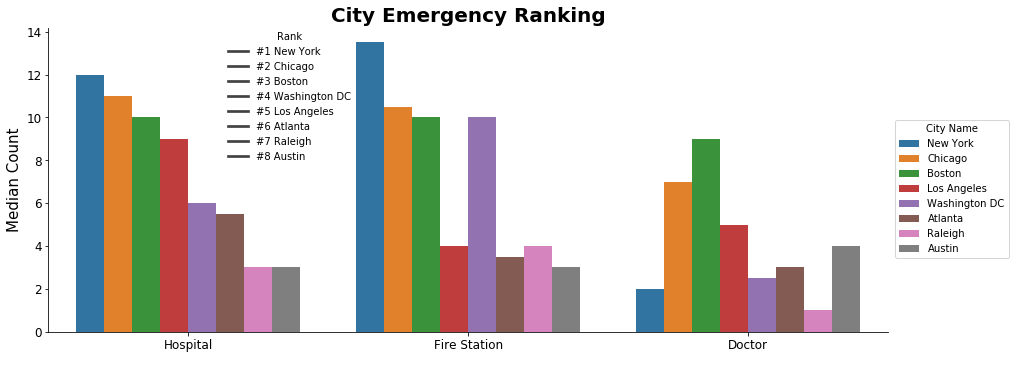

In [30]:
print("========================================")
print("==================TEST====================")

sns.factorplot(kind='bar',x='Type',y='Total Count',data=new_all_emergency_df,
               hue='City Name', size=5, aspect=2.5)

total_count = new_all_emergency_df.groupby(['City Name'])['Total Count'].median().sort_values()[::-1].reset_index()
total_count_df = pd.DataFrame(total_count)
print(total_count_df)
ranks_dict = {}
y=1
for name in total_count_df['City Name']:
    ranks_dict[name] = y
    y=y+1
print(ranks_dict)

plt.title('City Emergency Ranking', fontsize=20, fontweight='bold')

plt.xlabel(' ', fontsize=15)
plt.ylabel('Median Count', fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

new_labels = ['#1 New York', '#2 Chicago', '#3 Boston', '#4 Washington DC', '#5 Los Angeles', '#6 Atlanta',
              '#7 Raleigh', '#8 Austin']
plt.legend(new_labels, frameon=False, title='Rank',
           bbox_to_anchor=(.365, 1), loc=1, borderaxespad=0.)


print("========================================")
print("==================END====================")
plt.savefig('Save_Figs/Emergency.png', bbox_inches='tight')

plt.show()